# 3-Machine Learning with the Preferential Balloting Random Forest
In this notebook, I create and run the Random Forest setup of my own design, the Preferential Balloting Random Forest. By running many decorrelated Decision Tree Classifiers on my Awards Season data set (see [scraping](https://github.com/njparker1993/oscars_predictions/blob/master/scraping.ipynb) and [table_assemblage](https://github.com/njparker1993/oscars_predictions/blob/master/table_assembling.ipynb) notebooks for the feature creation). Using this strategy I simulate the Oscars with a voting body of around 7,000 members.

In [67]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Setting Up our DataFrame
First, we load in the ML ready data frame from the table_assemling notebook

In [77]:
full_table = pd.read_csv('./data/processed_results/osc_df')
full_table=full_table.drop('Unnamed: 0', axis=1)
full_table

,year,film,wiki,winner,nominations,Oscar_win,nom_gg_drama,winner_gg_drama,nom_gg_comedy,winner_gg_comedy,nom_pga,winner_pga,nom_bafta,winner_bafta,nom_dga,winner_dga,nom_sag,winner_sag
0,1927,Wings,/wiki/Wings_(1927_film),True,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1927,7th Heaven,/wiki/7th_Heaven_(1927_film),False,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1927,The Racket,/wiki/The_Racket_(1928_film),False,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1928,The Broadway Melody,/wiki/The_Broadway_Melody,True,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1928,Alibi,/wiki/Alibi_(1929_film),False,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2022,The Fabelmans,/wiki/The_Fabelmans,False,7.0,0,1,1,0,0,1,0,0,0,1,0,1,0
587,2022,Tár,/wiki/T%C3%A1r,False,7.0,0,1,0,0,0,1,0,1,0,1,0,0,0
588,2022,Top Gun: Maverick,/wiki/Top_Gun:_Maverick,False,6.0,0,1,0,0,0,1,0,0,0,1,0,0,0
589,2022,Triangle of Sadness,/wiki/Triangle_of_Sadness,False,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [78]:
full_table2 = pd.read_csv('./data/processed_results/extended_df.csv')
full_table2=full_table2.drop('Unnamed: 0', axis=1)
full_table2

,year,film,wiki,rating,numVotes,worldwide_box_office,action,adventure,animation,biography,...,nom_gg_comedy,winner_gg_comedy,nom_pga,winner_pga,nom_bafta,winner_bafta,nom_dga,winner_dga,nom_sag,winner_sag
0,1927,Wings,/wiki/Wings_(1927_film),7.3,13576.0,746,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1927,7th Heaven,/wiki/7th_Heaven_(1927_film),5.2,26223.0,79808,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1927,The Racket,/wiki/The_Racket_(1928_film),6.7,3149.0,21733230,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1928,The Broadway Melody,/wiki/The_Broadway_Melody,5.6,7605.0,223723,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1928,Alibi,/wiki/Alibi_(1929_film),7.4,391.0,42915,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,2022,The Fabelmans,/wiki/The_Fabelmans,7.6,85709.0,45164110,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
485,2022,Tár,/wiki/T%C3%A1r,7.5,69684.0,27541681,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
486,2022,Top Gun: Maverick,/wiki/Top_Gun:_Maverick,8.3,577408.0,1493491858,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
487,2022,Triangle of Sadness,/wiki/Triangle_of_Sadness,7.3,128812.0,25615870,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [79]:
full_table3 = pd.read_csv('./data/processed_results/everything.csv')
full_table3 = full_table3.drop('Unnamed: 0', axis=1)
full_table3

,year,film,wiki,rating,numVotes,worldwide_box_office,action,adventure,animation,biography,...,winner_sag,Acting,Production Design,Directing,VFX,Writing,Cinematography,Sound,Film Editing,Music
0,1927,Wings,/wiki/Wings_(1927_film),7.3,13576.0,746,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1927,7th Heaven,/wiki/7th_Heaven_(1927_film),5.2,26223.0,79808,0,0,0,0,...,0,1,1,1,0,1,0,0,0,0
2,1927,The Racket,/wiki/The_Racket_(1928_film),6.7,3149.0,21733230,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1928,The Broadway Melody,/wiki/The_Broadway_Melody,5.6,7605.0,223723,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1928,Alibi,/wiki/Alibi_(1929_film),7.4,391.0,42915,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2022,The Fabelmans,/wiki/The_Fabelmans,7.6,85709.0,45164110,0,0,0,0,...,0,1,1,1,0,1,0,0,0,1
469,2022,Tár,/wiki/T%C3%A1r,7.5,69684.0,27541681,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
470,2022,Top Gun: Maverick,/wiki/Top_Gun:_Maverick,8.3,577408.0,1493491858,0,0,0,0,...,0,0,0,0,1,1,0,1,1,1
471,2022,Triangle of Sadness,/wiki/Triangle_of_Sadness,7.3,128812.0,25615870,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [86]:
full_table1=full_table[full_table['wiki'].isin(full_table3['wiki'])]
full_table1

,year,film,wiki,winner,nominations,Oscar_win,nom_gg_drama,winner_gg_drama,nom_gg_comedy,winner_gg_comedy,nom_pga,winner_pga,nom_bafta,winner_bafta,nom_dga,winner_dga,nom_sag,winner_sag
0,1927,Wings,/wiki/Wings_(1927_film),True,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1927,7th Heaven,/wiki/7th_Heaven_(1927_film),False,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1927,The Racket,/wiki/The_Racket_(1928_film),False,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1928,The Broadway Melody,/wiki/The_Broadway_Melody,True,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1928,Alibi,/wiki/Alibi_(1929_film),False,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2022,The Fabelmans,/wiki/The_Fabelmans,False,7.0,0,1,1,0,0,1,0,0,0,1,0,1,0
587,2022,Tár,/wiki/T%C3%A1r,False,7.0,0,1,0,0,0,1,0,1,0,1,0,0,0
588,2022,Top Gun: Maverick,/wiki/Top_Gun:_Maverick,False,6.0,0,1,0,0,0,1,0,0,0,1,0,0,0
589,2022,Triangle of Sadness,/wiki/Triangle_of_Sadness,False,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [84]:
full_table4=full_table2[full_table2['wiki'].isin(full_table3['wiki'])]
full_table4

,year,film,wiki,rating,numVotes,worldwide_box_office,action,adventure,animation,biography,...,nom_gg_comedy,winner_gg_comedy,nom_pga,winner_pga,nom_bafta,winner_bafta,nom_dga,winner_dga,nom_sag,winner_sag
0,1927,Wings,/wiki/Wings_(1927_film),7.3,13576.0,746,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1927,7th Heaven,/wiki/7th_Heaven_(1927_film),5.2,26223.0,79808,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1927,The Racket,/wiki/The_Racket_(1928_film),6.7,3149.0,21733230,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1928,The Broadway Melody,/wiki/The_Broadway_Melody,5.6,7605.0,223723,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1928,Alibi,/wiki/Alibi_(1929_film),7.4,391.0,42915,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,2022,The Fabelmans,/wiki/The_Fabelmans,7.6,85709.0,45164110,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
485,2022,Tár,/wiki/T%C3%A1r,7.5,69684.0,27541681,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
486,2022,Top Gun: Maverick,/wiki/Top_Gun:_Maverick,8.3,577408.0,1493491858,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
487,2022,Triangle of Sadness,/wiki/Triangle_of_Sadness,7.3,128812.0,25615870,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [85]:
print(len(full_table))
print(len(full_table4))
print(len(full_table3))

591
473
473


In [80]:
min_year = 1995 # This is the first year that all awards shows have occured
# Training Set - Excluding 2022
train = full_table.loc[((full_table['year'] < 2022) & (full_table['year'] > min_year))]
test_2022 = full_table.loc[(full_table['year'] == 2022)]

print('Training set contains:', train.shape[0], 'movies')
print('Prediciting on:', test_2022.shape[0], 'movies')

Training set contains: 181 movies
Prediciting on: 10 movies


In [81]:
min_year = 1995 # This is the first year that all awards shows have occured
# Training Set - Excluding 2022
train2 = full_table2.loc[((full_table2['year'] < 2022) & (full_table2['year'] > min_year))]
test2_2022 = full_table2.loc[(full_table2['year'] == 2022)]

print('training set contains:', train2.shape[0], 'movies')
print('Prediciting on:', test2_2022.shape[0], 'movies')

training set contains: 178 movies
Prediciting on: 9 movies


In [82]:
min_year = 1995 # This is the first year that all awards shows have occured
# Training Set - Excluding 2022
train3 = full_table3.loc[((full_table3['year'] < 2022) & (full_table3['year'] > min_year))]
test3_2022 = full_table3.loc[(full_table3['year'] == 2022)]

print('training set contains:', train3.shape[0], 'movies')
print('Prediciting on:', test3_2022.shape[0], 'movies')

training set contains: 172 movies
Prediciting on: 9 movies


In [61]:
# Identify predictors

full_predictors = ['year','nom_gg_drama', 'winner_gg_drama', 'nom_gg_comedy', 'winner_gg_comedy',
       'nom_pga', 'winner_pga', 'nom_bafta', 'winner_bafta', 'nom_dga', 'winner_dga',
        'nom_sag', 'winner_sag', 'nominations']
full_predictors2 = ['year', 'rating', 'numVotes',
       'worldwide_box_office', 'action', 'adventure', 'animation', 'biography',
       'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy',
       'film-noir', 'history', 'horror', 'music', 'musical', 'mystery',
       'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western',
       'nominations', 'Oscar_win', 'nom_gg_drama', 'winner_gg_drama',
       'nom_gg_comedy', 'winner_gg_comedy', 'nom_pga', 'winner_pga',
       'nom_bafta', 'winner_bafta', 'nom_dga', 'winner_dga', 'nom_sag',
       'winner_sag']
full_predictors3=['year', 'rating', 'numVotes',
       'worldwide_box_office', 'action', 'adventure', 'animation', 'biography',
       'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy',
       'film-noir', 'history', 'horror', 'music', 'musical', 'mystery',
       'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western',
       'nominations', 'Oscar_win', 'nom_gg_drama', 'winner_gg_drama',
       'nom_gg_comedy', 'winner_gg_comedy', 'nom_pga', 'winner_pga',
       'nom_bafta', 'winner_bafta', 'nom_dga', 'winner_dga', 'nom_sag',
       'winner_sag', 'Acting', 'Production Design', 'Directing', 'VFX',
       'Writing', 'Cinematography', 'Sound', 'Film Editing', 'Music']
nominees = ['Everything Everywhere All at Once', 'All quiet on the Western Front', 'Avatar: The Way of Water', 'The Banshees of Inisherin', 'Elvis', 'The Fablemans', 'Tár', 'Top Gun: Maverick', 'Triangle of Sadness', 'Women Talking']


In [75]:
print(len(nominees))

10


In [13]:
print(list(test_2022.film))

['Everything Everywhere All at Once', 'Avatar: The Way of Water', 'The Banshees of Inisherin', 'Elvis ', 'The Fabelmans', 'Tár', 'Top Gun: Maverick', 'Triangle of Sadness', 'Women Talking ']


# Simulating a Voter using a Decision Tree
Each 'Voter' will take a Decisions Tree trained on a smaller part of the data to pick that voter's rankings of the Best Picture Nominees

In [14]:
# The model I am using to predict per voter is a Decison Tree
voter1 = DecisionTreeClassifier(splitter='random',
                                max_depth=3,# Low depth allows for some randomness
                                min_samples_leaf=3,
                                random_state = 92)

Each DecisionTree in our Preferential Balloting Random Forest needs to produce ranked ballot rather that a classificaiton per film. The difference in the outputs of a tree from a Traditiona Random Forest and a tree from this Preferential Balloting Random Forest can be seen below:

![title](pb_rf_tree.png)

In [15]:
def simulate_a_vote(model, train_df, to_predict_df, full_predictors):
    """
    This function creates, trains, and predicts with a DecisionTree to simulate an Academy voter.
    Each tree only sees a part of the data and gets Noise to decorrelate them from each other.
    The prediction is then ranked to create our ballot for Preferential Balloting
    """
    
    train = train_df.copy()
    test = to_predict_df.copy()
    
    # A noise column, randomly generated each time represents a voter's bias
    #used to decorelate data from each other
    train.loc[:,'Noise'] = np.random.rand(train_df.shape[0])
    test.loc[:,'Noise'] = np.random.rand(to_predict_df.shape[0])

    # Looking at a random amount of awards shows (similar to bootstrapping)
    # This reflects a voter's attention to the season
    # num_features is how many of the features they care about
    num_features = np.random.choice(int(len(full_predictors)/1.7)) #full predictora are nominations and wins in other competitions
    voter_features = list(np.random.choice(full_predictors, num_features)) + ['Noise']

    x = np.array(train[voter_features])
    y = np.array(train['Oscar_win'])
    
    model.fit(x,y)
    
    # Probability of the voter will represent the ranked votes in the ballot_clean array
    ballot_clean = model.predict_proba(np.array(test[voter_features]))[:,1]
    # Add small random values to break up ties
    ballot = ballot_clean + np.random.rand(len(ballot_clean))/10000
    
    # Use np.argsort() to rank the order of the probA
    # The Academy uses ranked votes calculate winner

    temp = ballot.argsort() # indices that will sort ballot in ascending order
    ranks = np.empty_like(temp) #this array stores the rank of each ballot probability 
    ranks[temp] = np.arange(len(ballot)) #set values of ranks at the indices specified by temp
    ranks = np.abs(ranks - len(ballot)) #hghest rank corresponds to the smallest probability
    return ranks # ten ranks for each films on the nominated list - if rank[0]=2 first film on the list received the 3 hghest porbability 

vote = simulate_a_vote(voter1, train, test_2022, full_predictors)
print("This voter's ballot looks like:",vote)
position = np.argmin(vote)
print(f"This means their first choice is the {position + 1}th film in our df: {nominees[position]}")

# Simulating the Entire Academy
By 'casting a vote' many times, we can get the ballot from the entire academy

In [16]:
# function which returns a given number of ballots an nparray of ballots
def simulate_voting_body(num_voters, model, train_df, to_predict_df, full_predictors):
    """
    Runs simulate_a_vote and collects ballots from an academy of num_voters size
    """
    collected_ballots = np.zeros((num_voters, to_predict_df.shape[0]))
    for i in range(num_voters):
        collected_ballots[i,:] = simulate_a_vote(model, train_df, to_predict_df, full_predictors)
    return collected_ballots

In [22]:
n = 5
print(f'Here is an example of a {n}-person Academy:')
print(simulate_voting_body(n, voter1, train, test_2022, full_predictors))

Here is an example of a 5-person Academy:
[[9. 1. 7. 2. 5. 4. 6. 8. 3.]
 [9. 7. 3. 8. 2. 1. 6. 5. 4.]
 [2. 7. 4. 8. 9. 6. 5. 3. 1.]
 [4. 7. 3. 6. 1. 9. 2. 5. 8.]
 [1. 8. 3. 7. 2. 9. 6. 5. 4.]]


In [23]:
def tally_votes(voting_body, list_of_nominees):
    # List of nominees must be in the same order as the vote index
    #firsts is a numpy array where on an index where rank is 1 the value is one, everywhere a value is 0
    firsts = np.where(voting_body==1,1,0)
    tally = np.sum(firsts, axis = 0)
    tallied_votes_df = pd.DataFrame(tally, columns=['Votes']).T
    tallied_votes_df.columns = list_of_nominees
    return tallied_votes_df.T.sort_values('Votes', ascending = False)

Overall, this 1000-person academy's top picks look like this:


<AxesSubplot:>

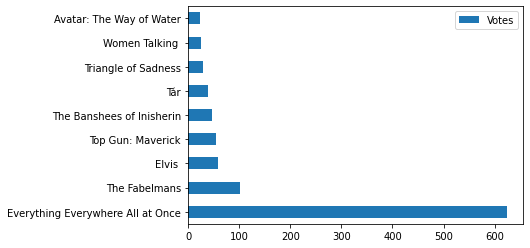

In [25]:
n = 1000
this_academy = simulate_voting_body(n, voter1, train2, test2_2022, full_predictors2)
print(f"Overall, this {n}-person academy's top picks look like this:")
plot_df1 = tally_votes(this_academy, nominees)
plot_df1.plot(kind="barh")

# Tiered Voting Changes
We start elimnating the least voted for film from the ballots and re-ranking the films

In [26]:
def remove_least(voting_body, list_of_nominees):
    """
    A function used for the elimination step of Preferential Balloting
    This function determines which film has the least #1 rankings and removes it
    """
    
    # List of nominees must be in the same order as the vote index
    firsts = np.where(voting_body==1,1,0)
    tally = np.sum(firsts, axis = 0)
    least_votes_index = np.argmin(tally)
    
    # Removes the least voted entry (from # 1 to 0)
    voting_body = np.delete(voting_body, least_votes_index, axis = 1)
    list_of_nominees.remove(list_of_nominees[least_votes_index])
    return voting_body, list_of_nominees

In [27]:
def re_rank_ballots(voting_body):
    """
    Another function used for the elimination step of Preferential Balloting
    Takes a voting body (numpy array)
    Makes sure each row goes from 1 to shape[1]
    """
    re_ranked = np.zeros(voting_body.shape)
    for i in range(voting_body.shape[0]):
        temp = voting_body[i,:].argsort()
        ranks = np.empty_like(temp)
        ranks[temp] = np.arange(len(voting_body[i,:]))
        re_ranked[i,:] = ranks + 1
    return re_ranked

In [28]:
def run_one_round_of_eliminations(voting_body, list_of_nominees):
    """
    A function which runs one elimination step of Preferential Balloting 
    Takes in a Voting Body and List of Nominess and returns them,
    but the film with the least #1 votes has bene removed
    """    
    voting_body, list_of_nominees = remove_least(voting_body, list_of_nominees)
    voting_body = re_rank_ballots(voting_body)
    return voting_body, list_of_nominees

In [29]:
new_votes, new_noms = run_one_round_of_eliminations(this_academy, nominees)

print(len(new_noms), 'films remaining')
print('\nNew Standings:')
tally_votes(new_votes, new_noms)

8 films remaining

New Standings:


,Votes
Everything Everywhere All at Once,629
The Fabelmans,103
Elvis,61
Top Gun: Maverick,59
The Banshees of Inisherin,49
Tár,42
Triangle of Sadness,30
Women Talking,27


## Re-Rank until one film has more than 50% of the vote
This is where the real simulation comes in.
We put together all the previous functions to simulate the result of the 2019 Best Picture voting

In [30]:
def run_preferential_voting(voting_body,list_of_nominees, show_steps = False):
    """
    Runs the process of Preferential Balloting on a voting_body(matrix)
    Terminates when one film has greater than 50% of the #1 votes
    """   
    top_pick_percent = tally_votes(voting_body,list_of_nominees).max()[0]/tally_votes(voting_body,list_of_nominees).sum()[0]
    while top_pick_percent < 0.5:
        voting_body,list_of_nominees = run_one_round_of_eliminations(voting_body, list_of_nominees)
        top_pick_percent = tally_votes(voting_body,list_of_nominees).max()[0]/tally_votes(voting_body,list_of_nominees).sum()[0]    
        if show_steps:
            print(tally_votes(voting_body, list_of_nominees),'\n')
    return voting_body, list_of_nominees

# Lets Simulate the Oscars!

In [55]:
min_year = 1995

# # Training Set - Excluding 2022
# train = full_table.loc[((full_table['year'] < 2022) & (full_table['year'] > min_year))]
# test_2022 = full_table.loc[(full_table['year'] == 2022)]

print('training set contains:', train.shape[0], 'movies')
print('Prediciting on:', test_2022.shape[0], 'movies')

# Identify features to predict on
full_predictors = ['year','nom_gg_drama', 'winner_gg_drama', 'nom_gg_comedy', 'winner_gg_comedy',
       'nom_pga', 'winner_pga', 'nom_bafta', 'winner_bafta', 'nom_dga', 'winner_dga',
        'nom_sag', 'winner_sag', 'nominations']

nominees=test_2022['film']
# PicK the model we want for each random voter
voter_model = DecisionTreeClassifier(splitter='random',
                                max_depth=3,
                                min_samples_leaf=3,
                                random_state = 92)

num_voters_academy = 10000
print(f'\nSimulating an Academy with {num_voters_academy} random voters.....')
academy_sim = simulate_voting_body(num_voters=num_voters_academy, model = voter_model, train_df = train, to_predict_df = test_2022, full_predictors=full_predictors)

print('\nInitial Rankings:\n----------------------------------------')
print(tally_votes(academy_sim, nominees),'\n')
print("Now we start eliminating films untill there one has more than 50% of the top picks:\n----------------------------------------")
final_ballot, final_films = run_preferential_voting(academy_sim, nominees, True)

training set contains: 181 movies
Prediciting on: 10 movies

Simulating an Academy with 10000 random voters.....

Initial Rankings:
----------------------------------------
                                   Votes
film                                    
Everything Everywhere All at Once   5103
The Fabelmans                       1483
The Banshees of Inisherin            690
Tár                                  512
Elvis                                435
Top Gun: Maverick                    414
Avatar: The Way of Water             364
Triangle of Sadness                  349
Women Talking                        333
All Quiet on the Western Front       317 

Now we start eliminating films untill there one has more than 50% of the top picks:
----------------------------------------


# And the Oscar goes to...

In [56]:
tally_votes(final_ballot, final_films)

,Votes
film,
Everything Everywhere All at Once,5103
The Fabelmans,1483
The Banshees of Inisherin,690
Tár,512
Elvis,435
Top Gun: Maverick,414
Avatar: The Way of Water,364
Triangle of Sadness,349
Women Talking,333


In [57]:
bp_winner = np.array(tally_votes(final_ballot, final_films).reset_index())[0][0].split('(')[0].strip()
final_ballot
print(f'And the Oscar goes to...\n🎉🏆{bp_winner}🏆🎉')

And the Oscar goes to...
🎉🏆Everything Everywhere All at Once🏆🎉


This random forest set-up simulated the academy and changed the normally vote counting process of the RF to use preferential balloting. I check the result of this prediciton process against a number of models in the [AutoML Machine Learning Notebook](https://github.com/njparker1993/oscars_predictions/blob/master/machine_learning_auto_ml.ipynb)

In [65]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

def whole_simulation(year, dataset, full_predictors):
    print('Simulating Oscars for', year)
    min_year = 1995

    # Training Set - Excluding the given year
    train = dataset.loc[((dataset['year'] < year) & (dataset['year'] > min_year))]
    test_2022 = dataset.loc[(dataset['year'] == year)]

    print('Training set contains:', train.shape[0], 'movies')
    print('Predicting on:', test_2022.shape[0], 'movies')

    nominees = dataset.loc[dataset['year'] == year, 'film'].tolist()
    print('List of nominees:', nominees)

    # Pick the model we want for each random voter
    voter_model = DecisionTreeClassifier(
        splitter='random',
        max_depth=3,
        min_samples_leaf=3,
        random_state=92
    )

    num_voters_academy = 10000
    print(f'\nSimulating an Academy with {num_voters_academy} random voters.....')
    academy_sim = simulate_voting_body(
        num_voters=num_voters_academy,
        model=voter_model,
        train_df=train,
        to_predict_df=test_2022,
        full_predictors=full_predictors
    )

    print('\nInitial Rankings:\n----------------------------------------')
    print(tally_votes(academy_sim, nominees), '\n')

    print("Now we start eliminating films until there is one with more than 50% of the top picks:\n----------------------------------------")
    final_ballot, final_films = run_preferential_voting(academy_sim, nominees, True)
    print(tally_votes(final_ballot, final_films))
    bp_winner = np.array(tally_votes(final_ballot, final_films).reset_index())[0][0].split('(')[0].strip()
    print(f'And the Oscar goes to...\n🎉🏆{bp_winner}🏆🎉')
    actual_winner = dataset.loc[(dataset['year'] == year) & (dataset['Oscar_win'] == 1), 'film'].values[0].strip()

    if bp_winner == actual_winner:
        print('Model predicted the winner correctly.')
    else:
        print('Model did not predict the winner correctly. The actual winner of the Oscar in', year, 'was', actual_winner)

    # Store the results
    num_votes_bp_winner = np.array(tally_votes(final_ballot, final_films).reset_index())[0][1]
    position_actual_winner = np.where(final_films == actual_winner)[0][0] + 1
    num_votes_actual_winner = np.array(tally_votes(final_ballot, final_films).reset_index())[position_actual_winner][1]
    results = {
        'Year': year,
        'Actual Winner': actual_winner,
        'Model Winner': bp_winner,
        'Votes for Model Winner': num_votes_bp_winner,
        'Position of Actual Winner': position_actual_winner,
        'Votes for Actual Winner before Elimination': num_votes_actual_winner
    }
    return results


In [66]:
# Example usage: Simulating Oscars for the years 2010 to 2022
years = range(2010, 2012)
results_list = []

for year in years:
    results = whole_simulation(year, full_table3, full_predictors3)
    results_list

Simulating Oscars for 2010
Training set contains: 71 movies
Predicting on: 10 movies
List of nominees: ["The King's Speech", 'Black Swan ', 'The Fighter', 'Inception', 'The Kids Are All Right ', '127 Hours', 'The Social Network', 'Toy Story 3', 'True Grit ', "Winter's Bone"]

Simulating an Academy with 10000 random voters.....

Initial Rankings:
----------------------------------------
                         Votes
The King's Speech         6432
The Social Network        1374
Inception                  442
The Fighter                379
Black Swan                 346
True Grit                  314
The Kids Are All Right     206
Toy Story 3                203
127 Hours                  184
Winter's Bone              120 

Now we start eliminating films until there is one with more than 50% of the top picks:
----------------------------------------
                         Votes
The King's Speech         6432
The Social Network        1374
Inception                  442
The Fighter     

IndexError: index 0 is out of bounds for axis 0 with size 0

In [62]:
whole_simulation(2021, full_table3, full_predictors3)

Simulating Oscars for  2021
Training set contains: 162 movies
Prediciting on: 10 movies
List of nominees:  ['West Side Story ', 'CODA ', 'Belfast ', "Don't Look Up", 'Drive My Car ', 'Dune ', 'King Richard ', 'Licorice Pizza', 'Nightmare Alley ', 'The Power of the Dog ']

Simulating an Academy with 10000 random voters.....

Initial Rankings:
----------------------------------------
                       Votes
CODA                    3100
The Power of the Dog    2548
West Side Story         1258
Dune                     787
King Richard             557
Don't Look Up            478
Belfast                  441
Licorice Pizza           296
Drive My Car             283
Nightmare Alley          252 

Now we start eliminating films untill there one has more than 50% of the top picks:
----------------------------------------
                       Votes
CODA                    3128
The Power of the Dog    2583
West Side Story         1308
Dune                     819
King Richard            